Logistic Regression:

 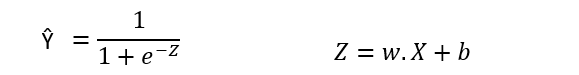

Y_hat --> predicted value

X --> Input Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

**Derivatives:**

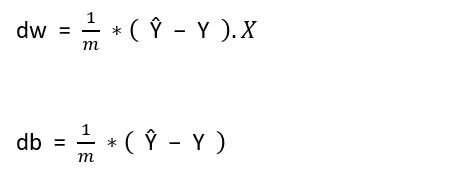

**Importing dependencies**

In [ ]:
import numpy as np

In [ ]:
class Logistic_Regression():

  #declariing learning rate and number of iterations (Hyperparameters)
  def __init__(self,learning_rate,no_of_iterations):

    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  # fit funtion to train the model with dataset
  def fit(self,x,y):

    # number of data points in the dataset(number of rows)--> m
    # number of input features in the dataset (number of columns)-->n
    self.m,self.n=x.shape

    #initiating weight and bias value

    self.w=np.zeros(self.n)

    self.b=0

    self.x=x

    self.y=y

    #implementing gradient descent for optimization

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):

    #y_hat formula (sigmoid funtion)

    y_hat=1/(1+np.exp(- (self.x.dot(self.w)+self.b) ))  #we are using dot because it is multiplication of two metrices(w,x)

    #derivaties

    dw=(1/self.m)*np.dot(self.x.T,(y_hat - self.y))

    db=(1/self.m)*np.sum(y_hat - self.y)

    #updating the weights and bias using gradient ddescent

    self.w=self.w - self.learning_rate*dw

    self.b=self.b - self.learning_rate*db

  #sigmoid equation and decision boundary
  def predict(self,x):

    y_pred=1/(1+np.exp(- (x.dot(self.w)+self.b) ))
    y_pred=np.where(y_pred>0.5,1,0)
    return y_pred



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data collection and analysis

PIMA Diabetes Dataset

In [ ]:
#loading the diabetes dataset to a pandas Dataframe
diabetes_dataset=pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset.shape

(768, 9)

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0--->non-diabetic
1--->diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# seperating the data and labels
features=diabetes_dataset.drop(columns='Outcome',axis=1)
target=diabetes_dataset['Outcome']

In [ ]:
print(features)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(features)  #learns the mean and standard deviation of the features dataset

StandardScaler()

In [ ]:
standardized_data=scaler.transform(features) #Returns a standardized version of features

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
features=standardized_data
target=diabetes_dataset['Outcome']

In [ ]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=2)

In [ ]:
print(features.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model


In [ ]:
 classifier=Logistic_Regression(learning_rate=0.01,no_of_iterations=1000)

In [ ]:
#training the support vector Machine Classifier
classifier.fit(x_train,y_train)

Model Evaluation

Accuracy score

In [ ]:
# accuracy score on the training data
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [ ]:
print('Accuracy score of the training data:',training_data_accuracy)

Accuracy score of the training data: 0.7768729641693811


In [ ]:
# accuracy score on the test data
x_test_prediction=classifier.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [ ]:
print('Accuracy score of the test data:',test_data_accuracy)

Accuracy score of the test data: 0.7662337662337663


Making a predictive system

In [ ]:
input_data=(4,110,92,0,0,37.6,0.191,30)

#changing the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for the instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if(prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
